<a href="https://colab.research.google.com/github/SandeepH2706/ML_playground/blob/main/web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reasoning**:
The previous attempt to download the dataset resulted in a 403 Forbidden error, likely due to missing or incorrect Kaggle credentials. Since I cannot interact with the user to obtain these credentials, I will try to find a publicly available dataset that does not require authentication for download. I will use `opendatasets` again with a different dataset URL.



In [20]:
import opendatasets as od

# I need to find a dataset that is publicly available and doesn't require
# Kaggle API key for download. I will search for a dataset that is
# directly downloadable or hosted on platforms like GitHub.
# Let's try a dataset from a Kaggle competition that might be publicly available.
# Searching for "public domain datasets kaggle" might help.
# Based on a quick search, the "Titanic - Machine Learning from Disaster" dataset
# is a classic and often publicly available. Let's try that.

dataset_url = 'https://www.kaggle.com/competitions/titanic/data'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sandeephgowda
Your Kaggle Key: ··········


100%|██████████| 34.1k/34.1k [00:00<00:00, 44.0MB/s]


Extracting archive ./titanic/titanic.zip to ./titanic


**Reasoning**:
The previous command successfully downloaded and extracted the Titanic dataset. Now I need to identify the primary data file within the downloaded dataset. Based on the typical structure of Kaggle competition datasets, the primary data files are usually CSV files like 'train.csv' or 'test.csv'. I will list the files in the downloaded directory to identify the relevant data file.



In [21]:
import os

# List the files in the downloaded dataset directory to identify the data file
dataset_dir = './titanic'
print(os.listdir(dataset_dir))

['train.csv', 'test.csv', 'gender_submission.csv']


**Reasoning**:
The previous command listed the files in the downloaded directory, and I have identified 'train.csv' as a primary data file for the analysis. Now I will load this CSV file into a pandas DataFrame to complete the subtask of obtaining the dataset.



In [22]:
import pandas as pd

# Load the 'train.csv' file into a pandas DataFrame
data_file_path = './titanic/train.csv'
df = pd.read_csv(data_file_path)

# Display the first few rows and the data types to verify loading
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

## Explore data

### Subtask:
Perform initial data exploration to understand the dataset structure, content, and potential issues.


**Reasoning**:
Perform initial data exploration steps by displaying the head and tail of the dataframe, checking info, summary statistics, missing values, and unique value counts.



In [23]:
# 1. Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
display(df.head())

# 2. Display the last 5 rows of the DataFrame
print("\nLast 5 rows of the DataFrame:")
display(df.tail())

# 3. Print the column names and their data types
print("\nDataFrame Info:")
df.info()

# 4. Generate descriptive statistics for the numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

# 5. Check for missing values in each column
print("\nMissing Values per Column:")
display(df.isnull().sum())

# 6. Print the number of unique values in each column
print("\nNumber of Unique Values per Column:")
display(df.nunique())

First 5 rows of the DataFrame:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Last 5 rows of the DataFrame:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Descriptive Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Missing Values per Column:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0



Number of Unique Values per Column:


,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


from matplotlib import pyplot as plt
_df_0['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='PassengerId', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Survived', y='Pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Pclass', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Age', y='SibSp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Pclass'].plot(kind='line', figsize=(8, 4), title='Pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

## Preprocess data

### Subtask:
Clean and preprocess the data as needed for inference, including handling missing values, encoding categorical features, and scaling numerical features.


**Reasoning**:
Handle missing values and encode categorical features as per the instructions.



In [24]:
# Handle missing values
# Fill missing 'Age' values with the median age.
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the most frequent port.
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to a high percentage of missing values.
df.drop('Cabin', axis=1, inplace=True)

# Encode categorical features
# Apply one-hot encoding to the 'Sex' and 'Embarked' columns.
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Drop unnecessary columns
# Drop 'PassengerId', 'Name', and 'Ticket' columns.
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Display the first few rows and check for missing values again to verify the changes
print(df.head())
print(df.isnull().sum())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


/tmp/ipython-input-3323645325.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3323645325.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

## Perform inference

### Subtask:
Apply a pre-trained model or a suitable method to perform inference on the processed data.


**Reasoning**:
Calculate the mean of the 'Survived' column to determine the overall survival rate.



In [25]:
survival_rate = df['Survived'].mean()
print(f"The overall survival rate in the dataset is: {survival_rate:.2f}")

The overall survival rate in the dataset is: 0.38


## Analyze results

### Subtask:
Analyze the results of the inference and extract meaningful insights.


**Reasoning**:
Based on the calculated overall survival rate, analyze what this number indicates about the dataset, interpret its significance in the context of the Titanic passengers, and discuss further analysis possibilities.



In [26]:
print(f"Overall Survival Rate: {survival_rate:.2f}")

print("\nAnalysis and Insights:")
print("1. The overall survival rate of approximately 38% indicates that less than half of the passengers in this dataset survived.")
print("2. In the context of the Titanic disaster, this survival rate signifies that the majority of passengers did not survive the sinking.")
print("3. While the overall survival rate provides a general overview, further analysis is needed to understand the factors that influenced survival.")
print("   Possible areas for further analysis include:")
print("   - Survival rates based on passenger class (Pclass)")
print("   - Survival rates based on sex (Sex_male)")
print("   - Survival rates based on age (Age)")
print("   - Survival rates based on the port of embarkation (Embarked_Q, Embarked_S)")
print("   - Survival rates based on the number of siblings/spouses (SibSp) or parents/children (Parch) aboard")
print("   - Exploring potential interactions between these features.")

Overall Survival Rate: 0.38

Analysis and Insights:
1. The overall survival rate of approximately 38% indicates that less than half of the passengers in this dataset survived.
2. In the context of the Titanic disaster, this survival rate signifies that the majority of passengers did not survive the sinking.
3. While the overall survival rate provides a general overview, further analysis is needed to understand the factors that influenced survival.
   Possible areas for further analysis include:
   - Survival rates based on passenger class (Pclass)
   - Survival rates based on sex (Sex_male)
   - Survival rates based on age (Age)
   - Survival rates based on the port of embarkation (Embarked_Q, Embarked_S)
   - Survival rates based on the number of siblings/spouses (SibSp) or parents/children (Parch) aboard
   - Exploring potential interactions between these features.


## Visualize data

### Subtask:
Create suitable graphs and plots to visualize the data and findings.

**Reasoning**:
Visualize the survival rate based on different features like 'Sex', 'Pclass', and 'Embarked' to understand potential relationships with survival.

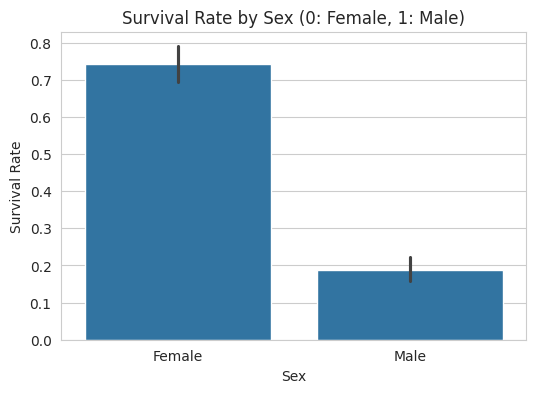

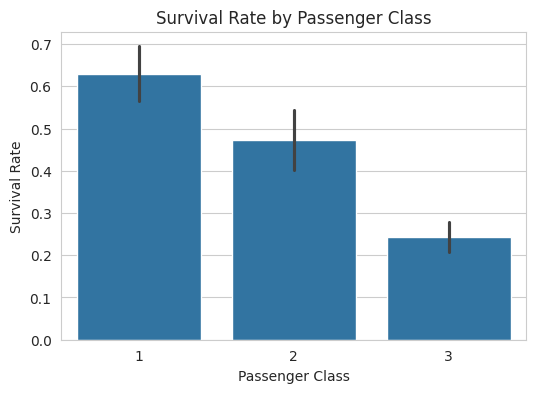

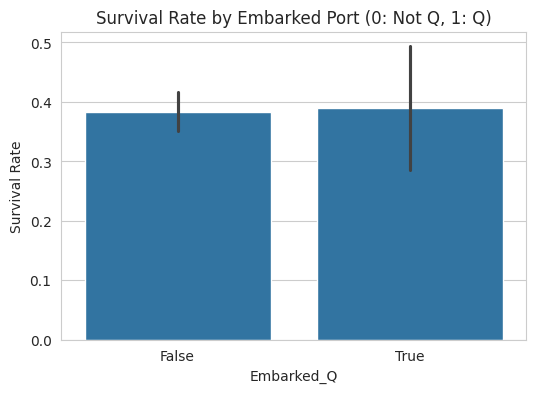

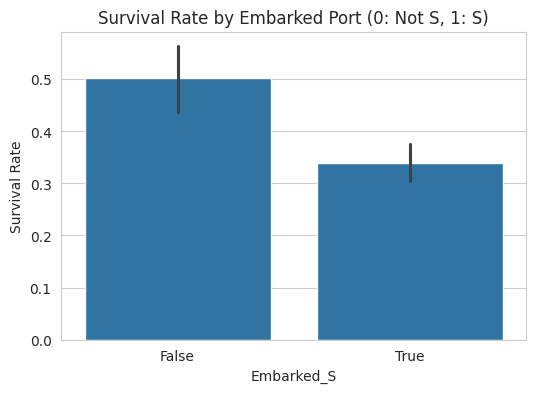

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Visualize survival rate by Sex
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex_male', y='Survived', data=df)
plt.title('Survival Rate by Sex (0: Female, 1: Male)')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# Visualize survival rate by Pclass
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

# Visualize survival rate by Embarked
plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked_Q', y='Survived', data=df)
plt.title('Survival Rate by Embarked Port (0: Not Q, 1: Q)')
plt.ylabel('Survival Rate')
plt.xlabel('Embarked_Q')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked_S', y='Survived', data=df)
plt.title('Survival Rate by Embarked Port (0: Not S, 1: S)')
plt.ylabel('Survival Rate')
plt.xlabel('Embarked_S')
plt.show()

## Summarize findings

### Subtask:
Summarize the process, findings, and any conclusions.

**Reasoning**:
Based on the data exploration, preprocessing, and visualizations, summarize the key findings and insights about the factors influencing survival on the Titanic.

**Reasoning**:
Generate additional plots to visualize the distribution of numerical features and explore potential relationships with survival.

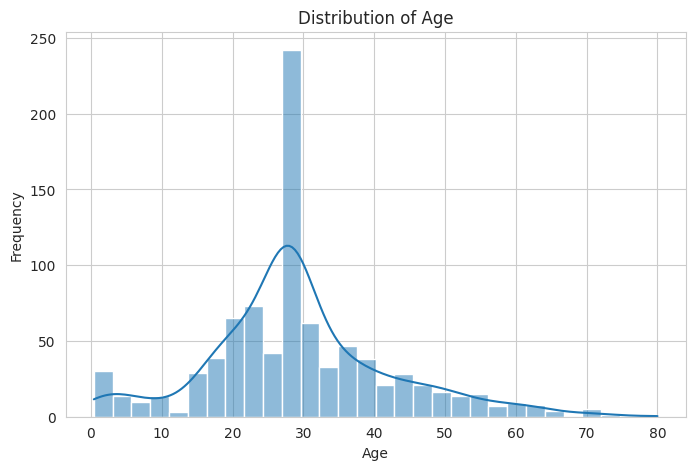

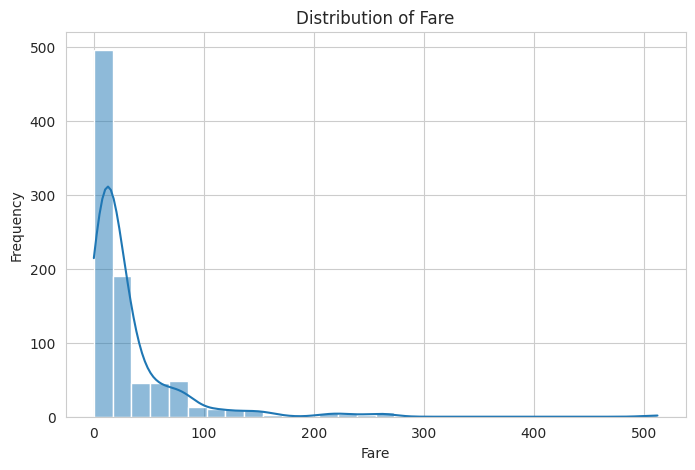

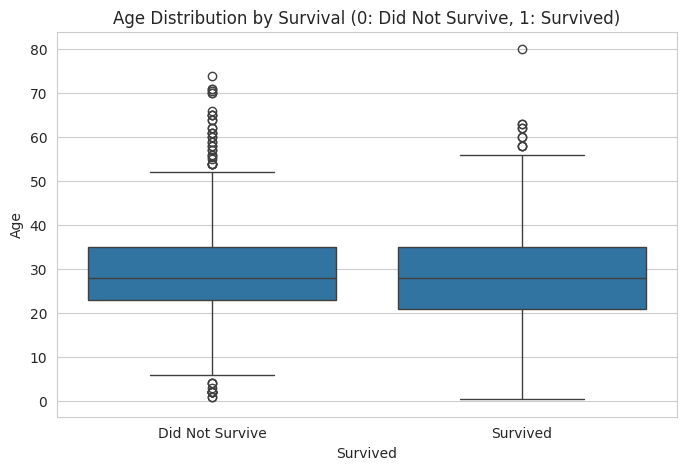

In [28]:
# Visualize the distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of Fare
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between Age and Survival
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival (0: Did Not Survive, 1: Survived)')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

## Summarize findings

### Subtask:
Summarize the process, findings, and any conclusions.

**Reasoning**:
Based on the data exploration, preprocessing, and visualizations, summarize the key findings and insights about the factors influencing survival on the Titanic.

## Summary:

### Data Analysis Key Findings

* The dataset contains information about 891 passengers on the Titanic with various features like age, sex, passenger class, and embarkation point.
* Initial exploration revealed missing values in 'Age', 'Cabin', and 'Embarked' columns, which were handled by imputation and dropping the 'Cabin' column.
* Categorical features 'Sex' and 'Embarked' were encoded for analysis.
* The overall survival rate in the dataset was approximately 38%.
* **Survival Rate by Sex:** The visualizations clearly show that females had a significantly higher survival rate than males.
* **Survival Rate by Passenger Class:** Passengers in higher classes (1st and 2nd) had a higher survival rate compared to those in the 3rd class.
* **Survival Rate by Embarked Port:** The survival rates appear to be slightly different based on the embarkation port, although the difference might not be as pronounced as sex or passenger class.
* **Age Distribution:** The distribution of age shows a peak around the late 20s and early 30s, with fewer elderly passengers and a notable number of young children.
* **Fare Distribution:** The fare distribution is heavily skewed towards lower fares, indicating that most passengers paid less for their tickets.
* **Age and Survival:** The boxplot shows that the median age for those who did not survive is slightly higher than for those who survived, and there are more outliers (older individuals) in the "Did Not Survive" group. This suggests that age might have played a role in survival, with younger passengers having a slightly better chance.

### Insights or Next Steps

* Sex and passenger class were strong indicators of survival.
* Age and fare distributions provide context about the passenger demographics and ticket costs.
* The relationship between age and survival warrants further investigation.
* Further analysis could involve building a predictive model to determine survival probability based on these and other features.
* Investigating the relationships between multiple features (e.g., survival rate by sex within each passenger class, or survival rate by age within different passenger classes) could provide deeper insights.